# data collection

In [5]:
import pandas as pd

data = pd.read_csv('Karachi_dataset.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())

print("\nCorrelation Matrix:")
print(data.corr())

First few rows of the dataset:
   Unnamed: 0                                         Address  NoOfBedrooms  \
0           0                    Bahria Town Karachi, Karachi             1   
1           1  Bahria Town - Precinct 17, Bahria Town Karachi             2   
2           2            Bahria Paradise, Bahria Town Karachi             5   
3           3                   Askari 5 - Sector J, Askari 5             3   
4           4   Bahria Town - Precinct 35, Bahria Sports City             4   

   NoOfBathrooms  AreaSqYards     Price  
0              1           60   4200000  
1              2          161   5900000  
2              5          500  42000000  
3              3          300  37500000  
4              4          350  21000000  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16849 entries, 0 to 16848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16849 

# data preprocessing

   Unnamed: 0                                         Address  NoOfBedrooms  \
0           0                    Bahria Town Karachi, Karachi             1   
1           1  Bahria Town - Precinct 17, Bahria Town Karachi             2   
2           2            Bahria Paradise, Bahria Town Karachi             5   
3           3                   Askari 5 - Sector J, Askari 5             3   
4           4   Bahria Town - Precinct 35, Bahria Sports City             4   

   NoOfBathrooms  AreaSqYards     Price  
0              1           60   4200000  
1              2          161   5900000  
2              5          500  42000000  
3              3          300  37500000  
4              4          350  21000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16849 entries, 0 to 16848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16849 non-null  int64 
 1   Address        16849 non-null  

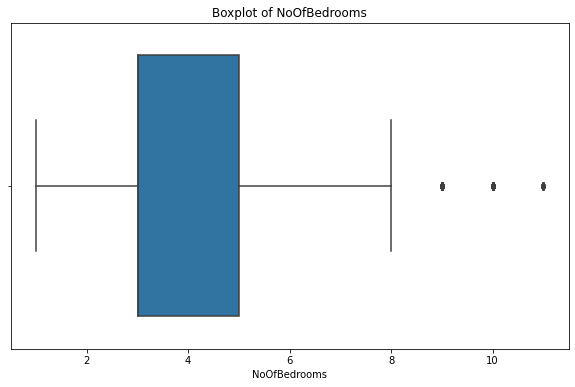

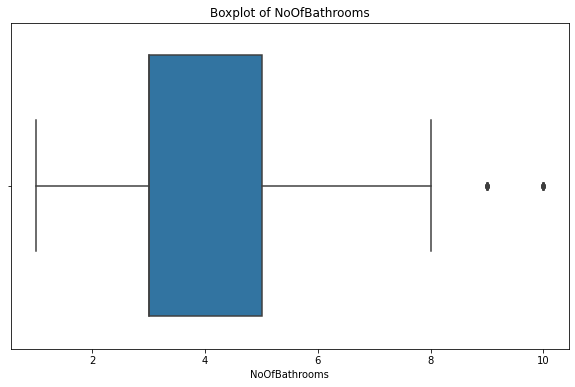

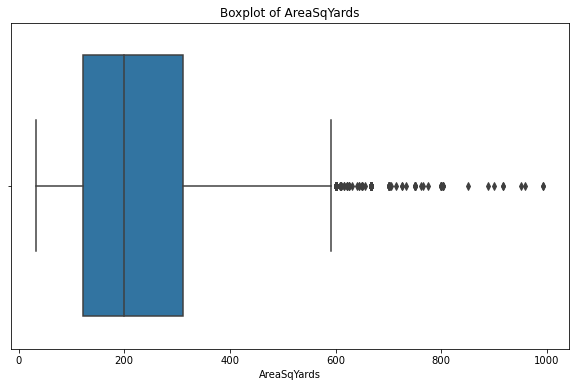

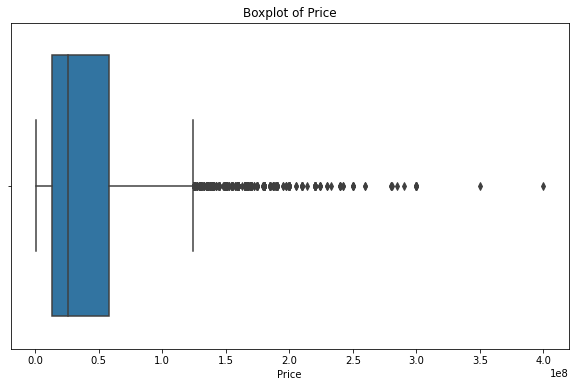

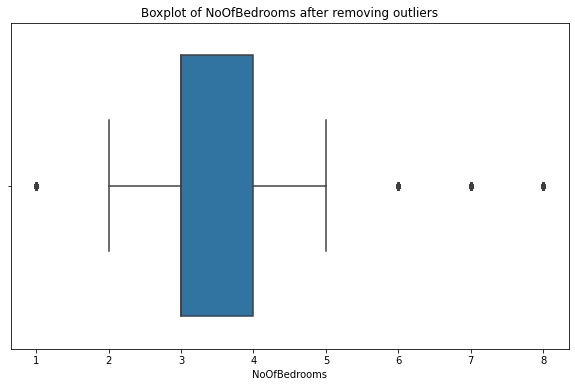

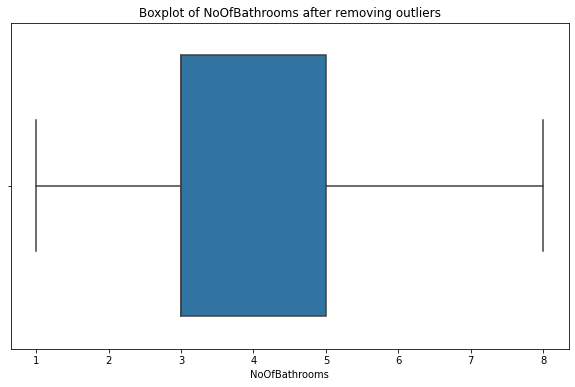

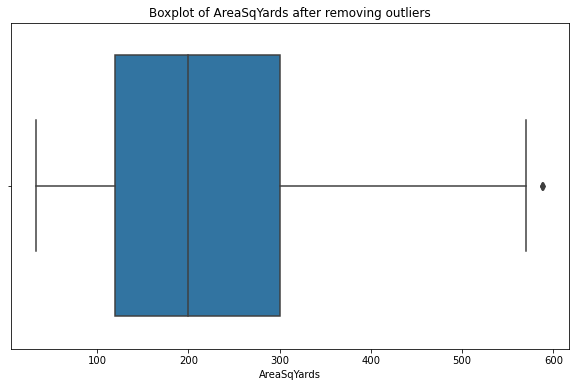

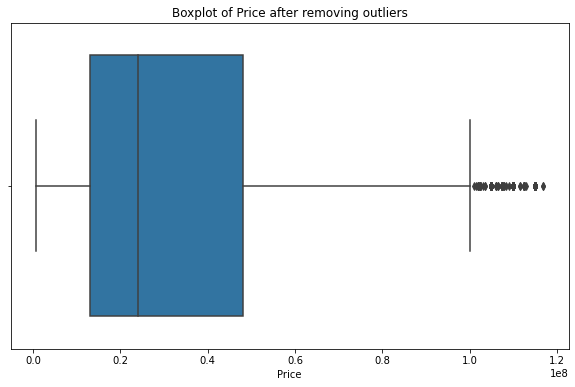

   Unnamed: 0                                         Address  NoOfBedrooms  \
0           0                    Bahria Town Karachi, Karachi     -1.910118   
1           1  Bahria Town - Precinct 17, Bahria Town Karachi     -1.132659   
2           2            Bahria Paradise, Bahria Town Karachi      1.199717   
3           3                   Askari 5 - Sector J, Askari 5     -0.355201   
4           4   Bahria Town - Precinct 35, Bahria Sports City      0.422258   

   NoOfBathrooms  AreaSqYards     Price  
0      -1.903077    -1.334999 -1.109917  
1      -1.173239    -0.508206 -1.045485  
2       1.016276     2.266873  0.322742  
3      -0.443401     0.629659  0.152187  
4       0.286437     1.038962 -0.473180  
   Unnamed: 0  NoOfBedrooms  NoOfBathrooms  AreaSqYards     Price  \
0           0     -1.910118      -1.903077    -1.334999 -1.109917   
1           1     -1.132659      -1.173239    -0.508206 -1.045485   
2           2      1.199717       1.016276     2.266873  0.322742 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Karachi_dataset.csv')

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

num_cols = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Price']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
data = data.dropna()
print(data.isnull().sum())

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} after removing outliers')
    plt.show()

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print(data.head())

data = pd.get_dummies(data, columns=['Address'], drop_first=True)
print(data.head())


# feature selection

Price            1.000000
AreaSqYards      0.812129
NoOfBathrooms    0.684680
NoOfBedrooms     0.631537
Unnamed: 0      -0.017115
Name: Price, dtype: float64


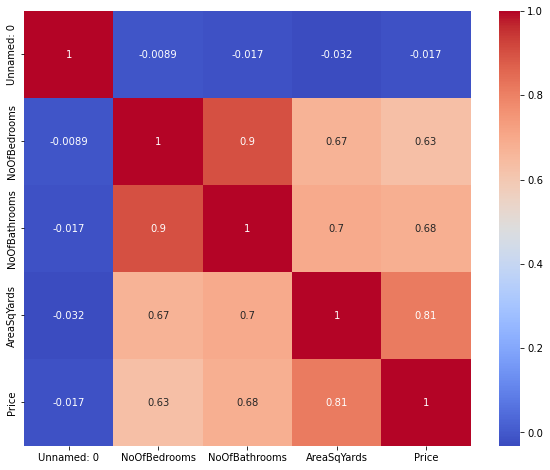

   NoOfBedrooms  NoOfBathrooms  AreaSqYards
0             1              1           60
1             2              2          161
2             5              5          500
3             3              3          300
4             4              4          350
0     4200000
1     5900000
2    42000000
3    37500000
4    21000000
Name: Price, dtype: int64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Karachi_dataset.csv')
num_cols = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Price']

corr_matrix = data.corr()
print(corr_matrix['Price'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

selected_features = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards']
X = data[selected_features]
y = data['Price']

print(X.head())
print(y.head())

# model development 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Karachi_dataset.csv')

num_cols = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Price']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

data = data.dropna()

Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in num_cols:
    data = data[(data[col] >= lower_bound[col]) & (data[col] <= upper_bound[col])]
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data = pd.get_dummies(data, columns=['Address'], drop_first=True)
selected_features = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards']
X = data[selected_features]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'RMSE: {rmse}')

Coefficients: [-0.1233699   0.37514568  0.65517031]
Intercept: 0.003949922105030704
RMSE: 0.5385717524523104


# model evaluation

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Karachi_dataset.csv')
num_cols = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Price']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
data = data.dropna()

Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in num_cols:
    data = data[(data[col] >= lower_bound[col]) & (data[col] <= upper_bound[col])]

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data = pd.get_dummies(data, columns=['Address'], drop_first=True)

selected_features = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards']
X = data[selected_features]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

Coefficients: [-0.1233699   0.37514568  0.65517031]
Intercept: 0.003949922105030704
RMSE: 0.5385717524523104
R-squared: 0.6912345880374795


# price prediction

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in num_cols:
    data = data[(data[col] >= lower_bound[col]) & (data[col] <= upper_bound[col])]

scaler = StandardScaler()
features = ['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards']
data[features] = scaler.fit_transform(data[features])

data = pd.get_dummies(data, columns=['Address'], drop_first=True)

X = data[features]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

new_house = pd.DataFrame({'NoOfBedrooms': [4], 'NoOfBathrooms': [3], 'AreaSqYards': [500]})
new_house_scaled = scaler.transform(new_house)
price_pred = model.predict(new_house_scaled)
print(f'Predicted Price: {price_pred[0]}')


Coefficients: [-3341603.32750514 10161214.97004313 17745976.45752417]
Intercept: 34075067.75499356
RMSE: 14587782.071867978
R-squared: 0.6912345880374797
Predicted Price: 67873590.61506791


# visualization

Predicted Price: 67873590.61506791


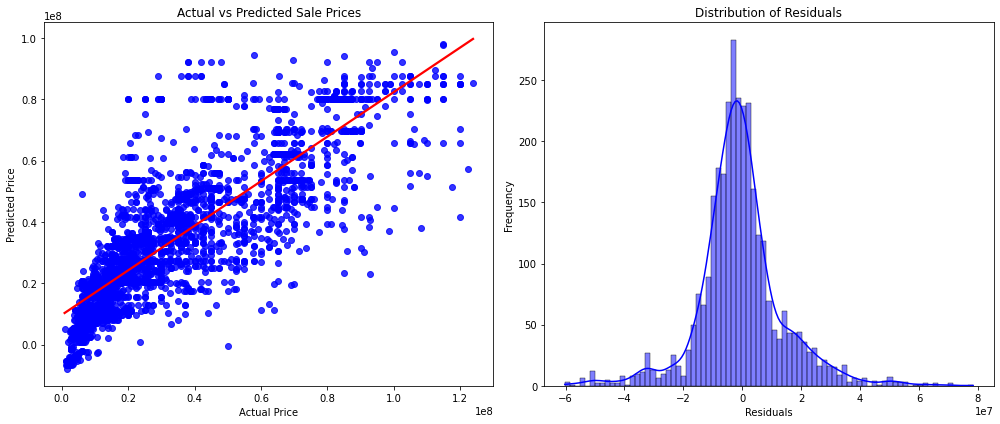

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

new_house = pd.DataFrame({'NoOfBedrooms': [4], 'NoOfBathrooms': [3], 'AreaSqYards': [500]})
new_house_scaled = scaler.transform(new_house)
price_pred = model.predict(new_house_scaled)
print(f'Predicted Price: {price_pred[0]}')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue', line_kws={"color": "red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Sale Prices')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()
